In [8]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_csv('./data/BTC-USD.csv')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-01,6318.140137,6547.140137,6311.830078,6377.779785,6377.779785,3789400000
1,2018-11-02,6378.919922,6396.859863,6327.379883,6388.439941,6388.439941,4234870000
2,2018-11-03,6387.240234,6400.069824,6342.370117,6361.259766,6361.259766,3658640000
3,2018-11-04,6365.470215,6388.629883,6294.569824,6376.129883,6376.129883,4390020000
4,2018-11-05,6363.620117,6480.589844,6363.620117,6419.660156,6419.660156,4174800000
...,...,...,...,...,...,...,...
1822,2023-10-28,33907.722656,34399.390625,33874.804688,34089.574219,34089.574219,10160330825
1823,2023-10-29,34089.371094,34743.261719,33947.566406,34538.480469,34538.480469,11160323986
1824,2023-10-30,34531.742188,34843.933594,34110.972656,34502.363281,34502.363281,17184860315
1825,2023-10-31,34500.078125,34719.253906,34083.308594,34667.781250,34667.781250,15758270810


In [9]:
# Chia train test validate theo tỉ lệ 7:1:2
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [10]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1) #x_train chứa các chỉ số, là biến độc lập
#reshape(-1,1) đảm bảo rằng x_train là một mảng 2D
#np.array(...) chuyển đổi...sang mảng numpy
y_train = np.array(train_data['Close']) #y_train chứa gtr Close, là biến phụ thuộc

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val = model.predict(x_val)

In [12]:
# 6. Quá trình tạo index predict 100 ngày tiếp theo
last_index =  df.index[-1] #lấy chỉ số dòng cuối cùng trong dataframe
last_data = pd.RangeIndex(start=last_index, stop=last_index+100, step=1)

# Tạo một mảng numpy chứa 100 số nguyên liên tiếp bắt đầu từ last_index + 1
x_next_100_days = np.array(range(last_index+1, last_index+101)).reshape(-1, 1)

# Dự đoán giá đóng cửa cho next 100 days
y_next_100_days = model.predict(x_next_100_days)

# In ra giá đóng cửa dự đoán cho 30 ngày tiếp theo
print('Predicted closing prices for the next 100 days:')
print(y_next_100_days)

Predicted closing prices for the next 100 days:
[75253.57077898 75297.56038723 75341.54999547 75385.53960372
 75429.52921197 75473.51882021 75517.50842846 75561.49803671
 75605.48764496 75649.4772532  75693.46686145 75737.4564697
 75781.44607795 75825.43568619 75869.42529444 75913.41490269
 75957.40451093 76001.39411918 76045.38372743 76089.37333568
 76133.36294392 76177.35255217 76221.34216042 76265.33176866
 76309.32137691 76353.31098516 76397.30059341 76441.29020165
 76485.2798099  76529.26941815 76573.25902639 76617.24863464
 76661.23824289 76705.22785114 76749.21745938 76793.20706763
 76837.19667588 76881.18628412 76925.17589237 76969.16550062
 77013.15510887 77057.14471711 77101.13432536 77145.12393361
 77189.11354185 77233.1031501  77277.09275835 77321.0823666
 77365.07197484 77409.06158309 77453.05119134 77497.04079958
 77541.03040783 77585.02001608 77629.00962433 77672.99923257
 77716.98884082 77760.97844907 77804.96805732 77848.95766556
 77892.94727381 77936.93688206 77980.92

In [13]:
# 7. Tính RMSE: Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2)) #mean: tính giá trị trung bình
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE cho validate và test
valid_mae = np.mean(np.abs(y_pred_val - y_val)) #abs: giá trị tuyệt đối
test_mae = np.mean(np.abs(y_pred - y_test))

# Tính MAPE cho validate và test
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 43024.3096996682
Testing RMSE: 37152.72388806062
Validation MAE: 42926.08012238176
Testing MAE: 36516.19029386621
Validation MAPE: 153.20052165809886
Testing MAPE: 172.38903684749863


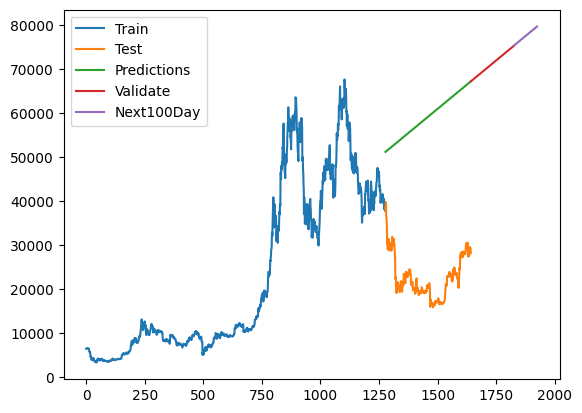

In [14]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_100_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next100Day'])
plt.show()

In [15]:
test_data.index

RangeIndex(start=1278, stop=1643, step=1)